<a href="https://colab.research.google.com/github/smeltedstone/IS4487/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [4]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [5]:
#data preparation
categorical_columns = ['order_date', 'order_year_month', 'customer_name', 'city', 'state_province', 'product_name', 'product_line']
df[categorical_columns] = df[categorical_columns].astype('category')

In [6]:
#outlier check and cleanup
for column in ['quantity', 'product_price']:
    mean = df[column].mean()
    std = df[column].std()
    df = df[np.abs(df[column] - mean) <= (3 * std)]

In [7]:
# Convert order_date to datetime dtype, setting errors='coerce'
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Filter out rows with NaT values (invalid dates)
df = df.dropna(subset=['order_date'])

# Now, df contains only rows with real dates in the 'order_date' column

In [8]:
df.dropna(inplace=True)

In [9]:
#impute values
df['total_amount'] = df['quantity'] * df['product_price']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54117 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          54117 non-null  int64         
 1   order_date        54117 non-null  datetime64[ns]
 2   order_year_month  54117 non-null  category      
 3   customer_name     54117 non-null  category      
 4   city              54117 non-null  category      
 5   state_province    54117 non-null  category      
 6   quantity          54117 non-null  float64       
 7   product_name      54117 non-null  category      
 8   product_line      54117 non-null  category      
 9   product_price     54117 non-null  float64       
 10  total_amount      54117 non-null  float64       
dtypes: category(6), datetime64[ns](1), float64(3), int64(1)
memory usage: 3.9 MB


In [11]:
df.describe()

,order_id,quantity,product_price,total_amount
count,54117.000000,54117.000000,54117.000000,5.411700e+04
mean,61649.623797,1.516178,614.229571,7.637448e+02
std,7518.949377,3.535103,816.871322,1.174737e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55640.000000,1.000000,7.950000,1.497000e+01
50%,61869.000000,1.000000,475.600000,4.756000e+02
75%,68067.000000,2.000000,914.620000,1.000440e+03
max,74147.000000,600.000000,3578.270000,2.024994e+06


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [12]:
#create variable
df['complete_customer_info'] = np.where(
    df[['customer_name', 'city', 'state_province']].notnull().all(axis=1),
    1,  # True for complete customer information
    2   # False for incomplete customer information
)

# Count the number of customers with complete and incomplete information
complete_info_count = df['complete_customer_info'].value_counts().sort_index()

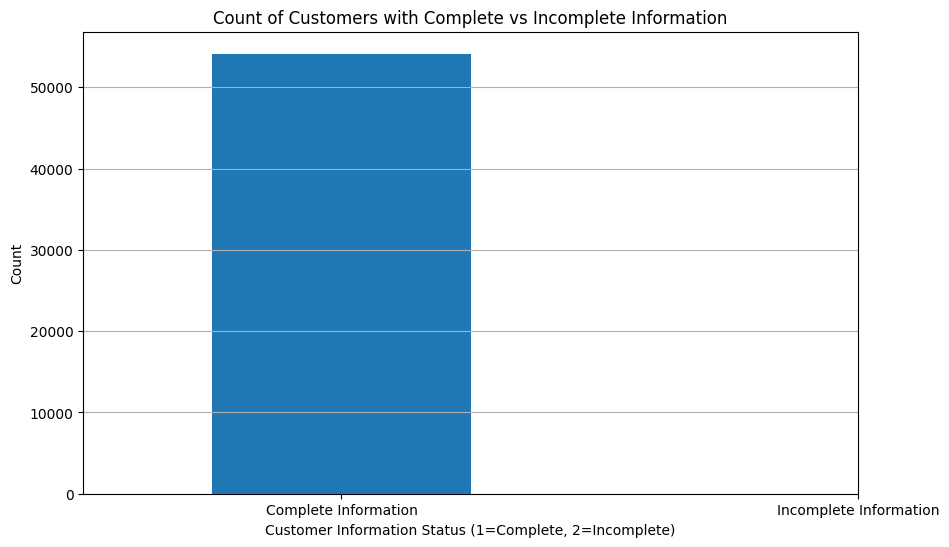

In [13]:
#create chart
# Plotting
plt.figure(figsize=(10, 6))
complete_info_count.plot(kind='bar')
plt.title('Count of Customers with Complete vs Incomplete Information')
plt.xlabel('Customer Information Status (1=Complete, 2=Incomplete)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Complete Information', 'Incomplete Information'], rotation=0)
plt.grid(axis='y')

plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

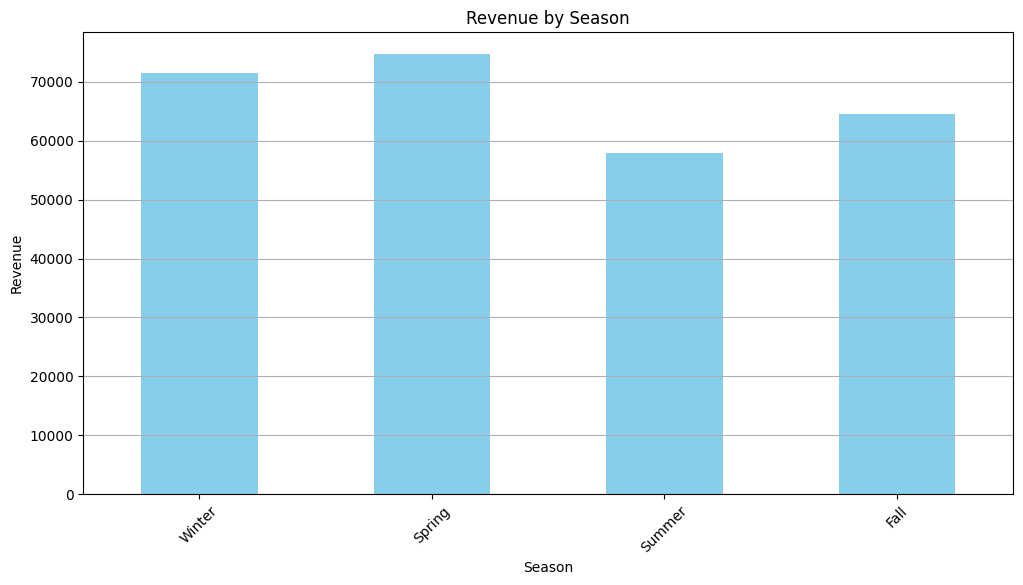

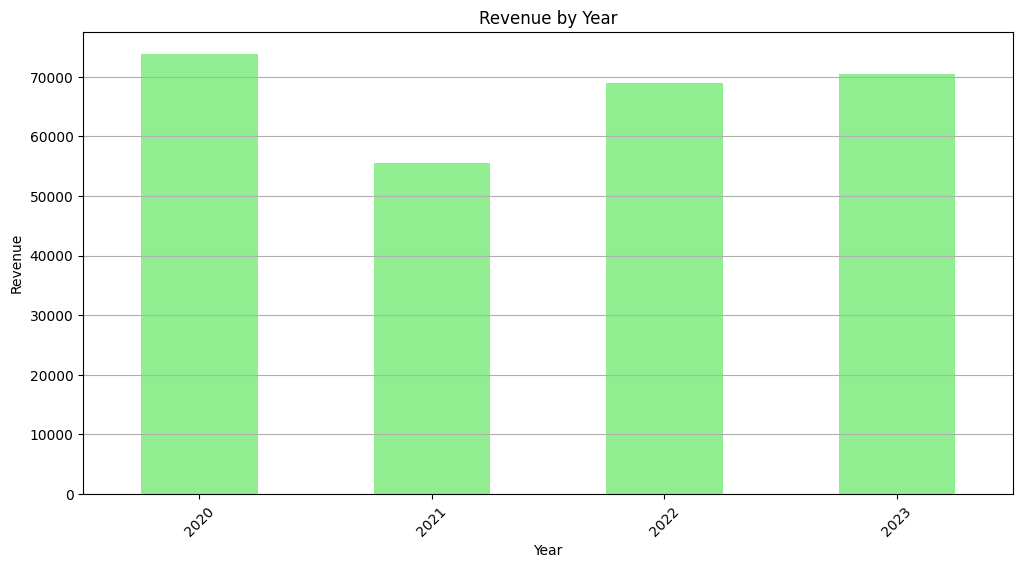

In [14]:
np.random.seed(0)  # For reproducible results

# Generating sample data
sample_order_dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='W').to_series()
sample_data = {
    'order_date': sample_order_dates,
    'quantity': np.random.randint(1, 10, size=sample_order_dates.size),
    'product_price': np.random.uniform(10, 500, size=sample_order_dates.size),
}
sample_df = pd.DataFrame(sample_data)

# Calculate total amount (revenue) for each order
sample_df['total_amount'] = sample_df['quantity'] * sample_df['product_price']

# Define a function to map each order date to its season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to categorize each order into a season
sample_df['season'] = sample_df['order_date'].dt.month.apply(get_season)
sample_df['year'] = sample_df['order_date'].dt.year

# Aggregate revenue by season and by year
revenue_by_season = sample_df.groupby('season')['total_amount'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
revenue_by_year = sample_df.groupby('year')['total_amount'].sum()

# Plotting revenue by season
plt.figure(figsize=(12, 6))
revenue_by_season.plot(kind='bar', color='skyblue')
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plotting revenue by year
plt.figure(figsize=(12, 6))
revenue_by_year.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

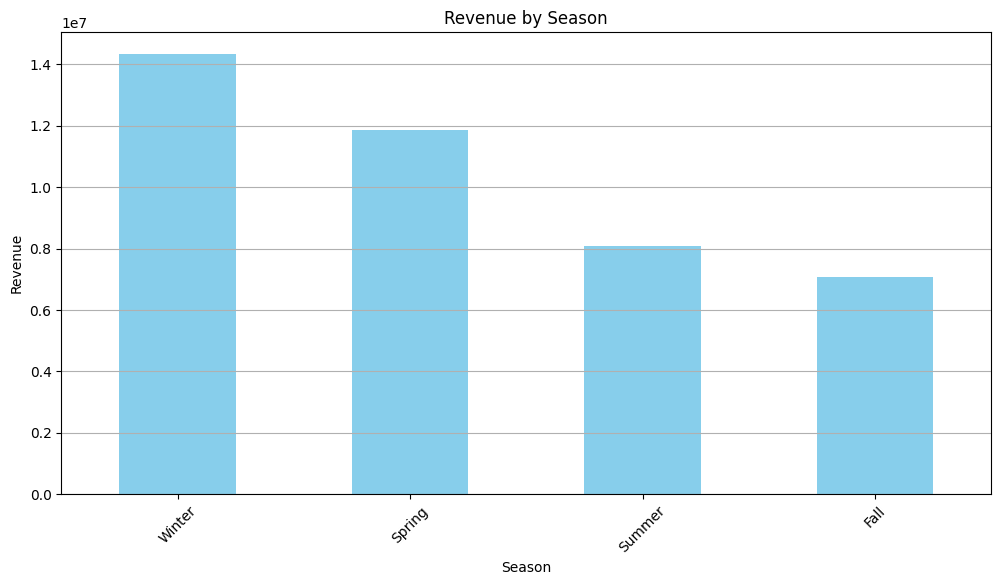

In [15]:
#seasonality
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['order_date'].dt.month.apply(get_season)
revenue_by_season = df.groupby('season')['total_amount'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plotting revenue by season
plt.figure(figsize=(12, 6))
revenue_by_season.plot(kind='bar', color='skyblue')
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

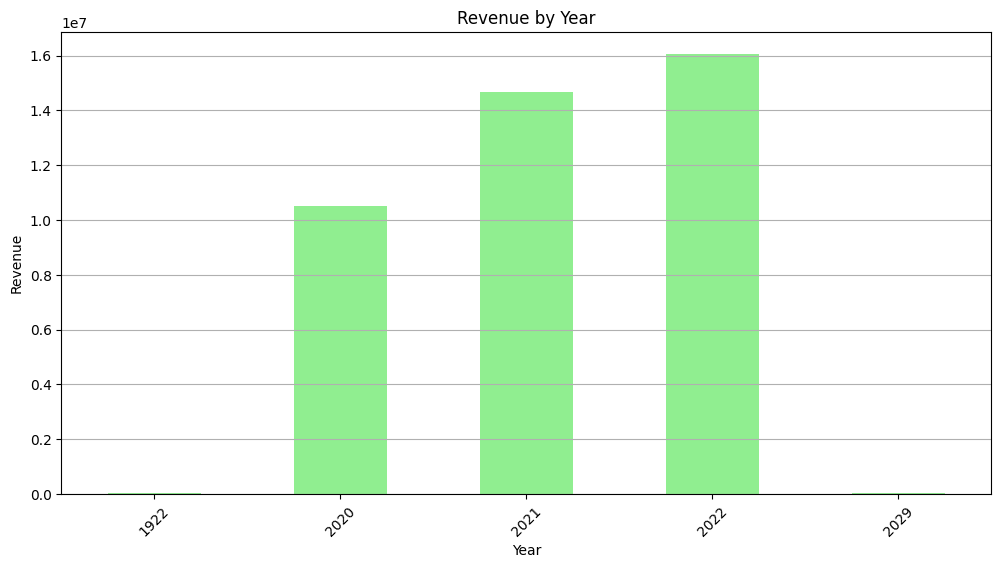

In [16]:
#revenue over time
df['year'] = df['order_date'].dt.year

revenue_by_year = df.groupby('year')['total_amount'].sum()

# Plotting revenue by year
plt.figure(figsize=(12, 6))
revenue_by_year.plot(kind='bar', color='lightgreen')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [17]:
# Assuming df is your DataFrame
unique_product_names = df['product_name'].unique()

# Convert the unique values into a DataFrame
unique_product_names_df = pd.DataFrame(unique_product_names, columns=['Unique Product Names'])

# Now you can view the unique_product_names_df as a DataFrame
unique_product_names_df

,Unique Product Names
0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear..."
1,"Road-750 Black, 52"
2,"Road-750 Black, 48"
3,"Road-750 Black, 44"
4,"Mountain-500 Black, 52"
...,...
123,"Long-Sleeve Logo Jersey, S"
124,Classmate Pulse Spiral Notebook
125,Acer 139 cm (55 inches) H Series 4K Ultra HD A...
126,"OnePlus 10R 5G (Forest Green, 8GB RAM, 128GB S..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54117 entries, 0 to 56044
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                54117 non-null  int64         
 1   order_date              54117 non-null  datetime64[ns]
 2   order_year_month        54117 non-null  category      
 3   customer_name           54117 non-null  category      
 4   city                    54117 non-null  category      
 5   state_province          54117 non-null  category      
 6   quantity                54117 non-null  float64       
 7   product_name            54117 non-null  category      
 8   product_line            54117 non-null  category      
 9   product_price           54117 non-null  float64       
 10  total_amount            54117 non-null  float64       
 11  complete_customer_info  54117 non-null  int64         
 12  season                  54117 non-null  object

In [19]:
# Assuming a DataFrame df similar to the one described, with a column 'product_line' and 'season'
# For demonstration, creating a simplified version of the DataFrame
data = {
    'product_line': ['Bike', 'TV', 'Smartphone', 'Jersey', 'USB LED Light', 'Mountain Shorts', 'Laptop', 'Hydration Pack'],
    'season': ['Summer', 'Winter', 'Spring', 'Fall', 'Winter', 'Summer', 'Spring', 'Fall'],
    'total_amount': np.random.rand(8) * 1000  # Random sales amounts for demonstration
}

df = pd.DataFrame(data)

# Define the criteria for Outdoor vs Indoor based on the product line
outdoor_criteria = ['Bike', 'Jersey', 'Mountain Shorts', 'Hydration Pack']
df['category'] = df['product_line'].apply(lambda x: 'Outdoor' if x in outdoor_criteria else 'Indoor')

# To show correlation between outdoor/indoor and season, we first need to quantify the seasons
# One way to approach this is to count the sales or occurrences of outdoor vs indoor products in each season
season_category_sales = df.groupby(['season', 'category'])['total_amount'].sum().unstack().fillna(0)


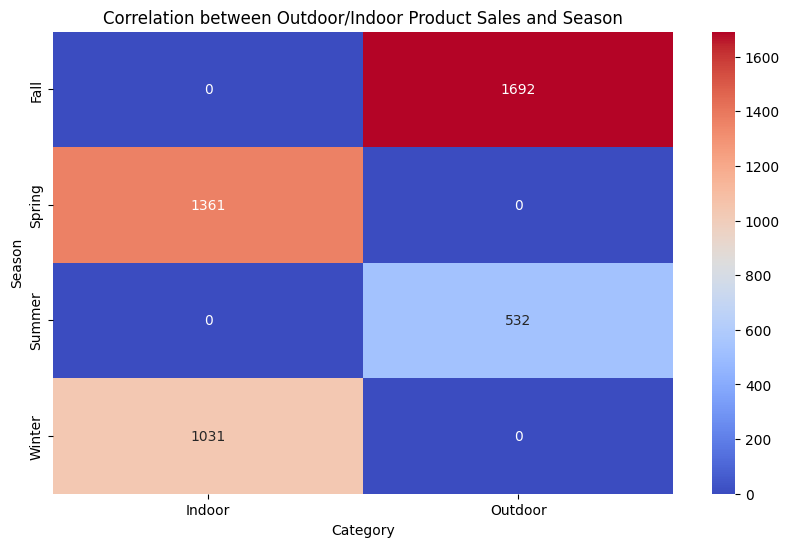

In [20]:
# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(season_category_sales, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Correlation between Outdoor/Indoor Product Sales and Season')
plt.ylabel('Season')
plt.xlabel('Category')
plt.show()